In [4]:
'''
File: spectra_analysis.ipynb
Author: Nikhil Garuda and Sarayu Gadi
Course: ASTR Research
Purpose: This code takes a 2-D spectra and averages the values to make a 1-D and plots it.
'''

%matplotlib widget
# magic cells
import os

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits


In [5]:
dir_path = '/Users/neelsharma/Desktop/ASTRProjects/G165/MMT/long_exposure'
filenames = os.listdir(dir_path)
for elem in sorted(filenames):
    print(elem)

slitA001_SDSSJ112727.80+423334.3t100793.fits
slitA002_SDSSJ112729.95+423256.8t100794.fits
slitA003_SDSSJ112730.01+423245.6t100795.fits
slitA004_SDSSJ112726.53+423312.6t100796.fits
slitA005_SDSSJ112730.27+423214.9t100797.fits
slitA006_SDSSJ112725.13+423306.7t100798.fits
slitA007_SDSSJ112729.87+423156.0t100799.fits
slitA008_SDSSJ112722.99+423310.7t100800.fits
slitA009_SDSSJ112731.60+423114.2t100801.fits
slitA010_SDSSJ112741.23+422856.4t100802.fits
slitA011_SDSSJ112739.32+422909.9t100803.fits
slitA012_SDSSJ112733.25+423014.1t100804.fits
slitA013_SDSSJ112739.18+422849.0t100805.fits
slitA014_SDSSJ112717.17+423307.5t100806.fits
slitA015_SDSSJ112714.58+423328.6t100807.fits
slitA016_SDSSJ112738.49+422819.6t100808.fits
slitA017_109057t100809.fits
slitA018_SDSSJ112715.04+423243.0t100810.fits
slitA019_SDSSJ112720.85+423120.7t100811.fits
slitA020_SDSSJ112715.03+423220.4t100812.fits
slitA021_113019t100813.fits
slitA022_SDSSJ112720.50+423048.5t100814.fits
slitA023_SDSSJ112720.22+423041.1t100815.fits

In [6]:
slit = "slitB149_SDSSJ112556.54+423003.4t101089.fits"

filename = dir_path + "/" + slit

no_skysub_flux, header = fits.getdata(filename, header=True)
wv = header["CRVAL1"] + header["CDELT1"]*np.arange(header["NAXIS1"])

print(wv)
header

[3883.59996795 3884.88996791 3886.17996787 ... 9271.9298086  9273.21980856
 9274.50980852]


SIMPLE  =                    T /  Written by IDL:  Tue Jan 16 14:32:56 2024     
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 4180 /                                                
NAXIS2  =                    4 /                                                
EXTEND  =                    T / Extensions may be present                      
BSCALE  =                    1 /           /                                    
BZERO   =                    0 /           /                                    
OBSERVAT= 'mmto'                           /                                    
TELESCOP= 'mmt_f5_adc'                     /                                    
ORIGIN  = 'MMT Binospec Camera'            /                                    
INSTRUME= 'Binospec'                       /                                    
CCDSUM  = '1 1'             

In [7]:
# make sure NaN are 0s
no_skysub_flux = np.nan_to_num(no_skysub_flux, nan=0)

# make 1d spectra by summing up the columns
oned_skysub_flux = np.sum(no_skysub_flux, axis=0)
oned_skysub_flux.shape

(4180,)

In [8]:
# plot 1D spectra
l_dict = {'Lylim': [912], 
            'Lyb': [1026], 
            'Lya': [1215.67], 
            'NV': [1240], 
            'SiII': [1260, 1527], 
            'CIII/SiIII': [1296.3], 
            'CII/NIII': [1323.9], 
            'SiII/OI': [1302], 
            ' ': [1304, 1403, 1550, 2799, 3970, 5167, 5184], 
            'CII': [1335, 2326], 
            'OIV': [1343.354], 
            'SiIV': [1394], 
            'SiIII': [1417.237], 
            'CIII': [1427.85, 1909], 
            'SV': [1501.76], 
            'CIV': [1548], 
            'FeII': [1608, 2344, 2374, 2587], 
            'HeII': [1640], 
            'AlII': [1671], 
            'AlIII': [1855], 
            '.': [1863, 2600, 5889, 5896, 6583, 6730], 
            'NeIV': [2424], 'MgII': [2796], 
            'NeV': [3346, 3426], 
            '[OII]': [3727], 
            'Hth': [3798], 
            'Heta': [3835], 
            'Hz': [3889], 
            'K': [3933], 
            'H,Hep': [3968], 
            'Hd': [4102], 
            'Gb': [4304], 
            'Hg': [4340], 
            'Hb': [4861], 
            '[OIII]': [4959, 5007], 
            'MgI': [5173], 
            'HeI,NaD': [5876], 
            'NII': [6548], 
            'Ha': [6563], 
            'SII': [6716], 
            'Bb': [6875], 
            'TiO': [7040], 
            'HeI': [7065.3], 
            'KI': [7680], 
            'Na': [8190], 
            'Cs': [8520]}

In [9]:
from astropy.convolution import Box1DKernel, convolve


boxcar = Box1DKernel(20)
box = convolve(oned_skysub_flux, boxcar)

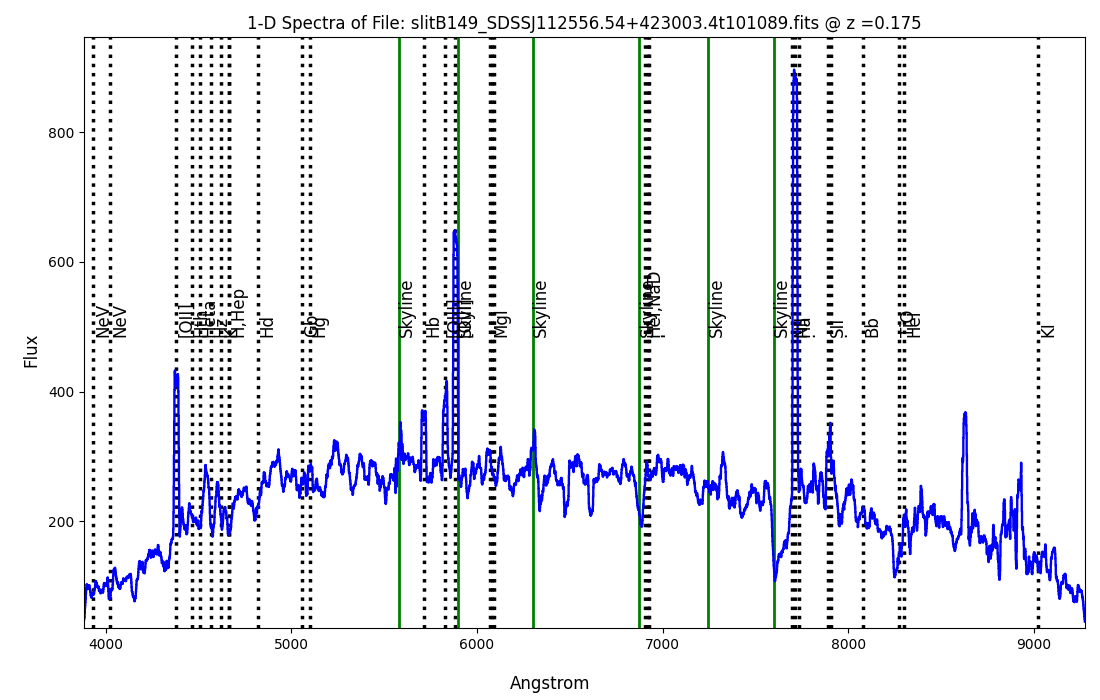

In [10]:
fig, axs = plt.subplots(1, sharex=True, figsize=(11,7)) 


axs.set_xlim(np.min(wv), np.max(wv)) 

ymin_no_skysub = np.min(box) - 10
ymax_no_skysub = np.max(box) + 50
axs.set_ylim(ymin_no_skysub, ymax_no_skysub) # if needed, change flux limits manually here

yann = (ymax_no_skysub+ymin_no_skysub)/2
yann2 = (ymax_no_skysub+ymin_no_skysub)/2
label_placement = (ymax_no_skysub+ymin_no_skysub)/2
xoffs = 5
zed = 0.175

for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        axs.axvline(x=lf, color='black',lw=2.5,ls=':')
        axs.annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=12)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            axs.axvline(x=lf, color='black',lw=2.5,ls=':')
            axs.annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=12)
    
    
axs.axvline(x=7600, color='green',lw=2,ls='-')
axs.annotate('Skyline',(7600,yann2),xytext=(7600-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
axs.axvline(x=7246, color='green',lw=2,ls='-')
axs.annotate('Skyline',(7246,yann2),xytext=(7246-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
axs.axvline(x=6875, color='green',lw=2,ls='-')
axs.annotate('Skyline',(6875,yann2),xytext=(6875-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
axs.axvline(x=6301, color='green',lw=2,ls='-')
axs.annotate('Skyline',(6301,yann2),xytext=(6301-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
axs.axvline(x=5895, color='green',lw=2,ls='-')
axs.annotate('Skyline',(5895,yann2),xytext=(5895-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
axs.axvline(x=5577, color='green',lw=2,ls='-')
axs.annotate('Skyline',(5577,yann2),xytext=(5577-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)
plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 12)
fig.supylabel('Flux', fontsize = 12) 
plt.title("1-D Spectra of File: " + slit + ' @ z =' + str(zed))

axs.plot(wv, box, drawstyle='steps', color='blue', linewidth=1.7)
plt.tight_layout()
plt.show()